**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: ISRAEL PARRA RANGEL
*   MATRÍCULA: A01797735

En esta actividad trabajarás con el archivo `personal_loan.csv`, basado en un conjunto de datos sobre clientes bancarios y su comportamiento financiero disponible en Kaggle.

Los datos fueron recopilados para analizar la posibilidad de que los clientes acepten un préstamo personal y contienen información demográfica, financiera y de productos bancarios asociados. Los indicadores incluidos son:

* `ID`: Identificador único del cliente
* `Age`: Edad del cliente (años completos)
* `Experience`: Experiencia laboral en años
* `Income`: Ingreso anual del cliente (en miles de dólares. Por ejemplo, 60 = 60,000 USD/año)
* `ZIP Code`: Código postal del cliente
* `Family`: Número de miembros de la familia
* `CCAvg`: Promedio de gastos mensuales con tarjeta de crédito (en miles de dólares)
* `Education`: Nivel educativo (1 = graduado, 2 = universitario, 3 = posgrado)
* `Mortgage`: Monto de hipoteca que posee el cliente (en miles de dólares)
* `Securities Account`: Indicador de si tiene cuenta de valores (1 = sí, 0 = no)
* `CD Account`: Indicador de si tiene cuenta de certificado de depósito (1 = sí, 0 = no)
* `Online`: Indicador de si usa los servicios bancarios en línea (1 = sí, 0 = no)
* `CreditCard`: Indicador de si es titular de tarjeta de crédito (1 = sí, 0 = no)
* `Personal Loan`: Si el cliente aceptó (1) o no (0) un préstamo personal. Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [6]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

1. Descarga el archivo: `personal_loan.csv` y guarda, en un dataframe (`loan_df`), todos sus registros.
* Haz que la columna `ID` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?

In [23]:
loan_df = pd.read_csv('/personal_loan.csv')
loan_df.set_index('ID', inplace=True)
loan_df.info()

# Cuántas columnas son numéricas y cuántas de texto? dtypes: float64(2), int64(6), texto(5)

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 5036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5037 non-null   int64  
 1   Experience          5037 non-null   int64  
 2   Income              5037 non-null   int64  
 3   ZIP Code            5037 non-null   int64  
 4   Family              5037 non-null   int64  
 5   CCAvg               5037 non-null   float64
 6   Education           5037 non-null   float64
 7   Mortgage            5037 non-null   int64  
 8   Personal Loan       5037 non-null   object 
 9   Securities Account  5037 non-null   object 
 10  CD Account          5037 non-null   object 
 11  Online              5037 non-null   object 
 12  CreditCard          5037 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 550.9+ KB


# Limpieza

2. Obtén las estadísticas descriptivas de las variables numéricas y examina cuidadosamente los valores obtenidos de cada columna.
* Filtra el dataframe para visualizar los registros en que la edad supera los 100 años y elimínalos si no son pausibles.
* Analiza el resto de las variables y elimina aquellos registros que contengan valores inválidos o inconsistentes. Para cada acción que realices, justifica la decisión, explicando por qué consideras que el valor es incorrecto.
* ¿Cuántos registros se eliminaron (considerando todas las acciones de este ejercicio) y qué porcentaje representa respecto al total del dataframe inicial?

In [24]:
print("Descriptivo variables:")
display(loan_df.describe())

initial_rows = loan_df.shape[0]

age_outliers = loan_df[loan_df['Age'] > 100]
print(f'registros con edad > 100: {age_outliers.shape[0]}')
display(age_outliers)

#Se identifican 3 registros con edad mayor a 100 años

loan_df = loan_df[loan_df['Age'] <= 100]
print(f"\nRemoved {age_outliers.shape[0]} registros con edad > 100. Registros restantes: {loan_df.shape[0]}")

# Al remover los registros quedan Remaining rows: 5034

# La experiencia no puede ser negativa por lo que se identifican esos registros y se eliminan
experience_outliers = loan_df[loan_df['Experience'] < 0]
print("\nRegistros con experiencia en negativo:")
display(experience_outliers)

loan_df = loan_df[loan_df['Experience'] >= 0]
print(f"\nRemoved {experience_outliers.shape[0]} registros con experiencia negativa. Registros restantes: {loan_df.shape[0]}")

# de igual forma no tienen sentido registros donde el valor en familia sea negativo por ello se eliminan
family_outliers = loan_df[loan_df['Family'] < 0]
print("\nRegistros con familia en negativo:")
display(family_outliers)

loan_df = loan_df[loan_df['Family'] >= 0]
print(f"\nRemoved {family_outliers.shape[0]} Registros familia negativos. Registros restantes: {loan_df.shape[0]}")

#Registros que no cumplen con educación 1 , 2 o 3
loan_df=loan_df[loan_df["Education"]<=3]
print(f"registros restantes:{loan_df.shape[0]}")


#registros restantes: 4978

Descriptivo variables:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage
count,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000,5037.000000
mean,45.411356,20.122494,73.898352,93152.865595,2.394679,1.942404,1.880941,56.500695
std,11.646805,11.461278,46.130504,2119.637960,1.151145,1.755954,0.843337,101.657580
min,23.000000,-3.000000,8.000000,9307.000000,-3.000000,0.000000,1.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000
max,144.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,7.300000,635.000000


registros con edad > 100: 3


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
10,123,39,105,94710,4,2.4,3.0,0,0,0,0,No,0
250,144,6,29,94305,3,1.0,2.0,117,0,No,0,No,No
4800,130,7,73,94028,1,2.5,1.0,135,0,No,0,0,0



Removed 3 registros con edad > 100. Registros restantes: 5034

Registros con experiencia en negativo:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
89,25,-1,113,94303,4,2.30,3.0,0,No,No,0,No,Yes
226,24,-1,39,94085,2,1.70,2.0,0,0,No,0,No,0
315,24,-2,51,90630,3,0.30,3.0,0,0,No,No,1,0
451,28,-2,48,94132,2,1.75,3.0,89,0,No,0,1,No
524,24,-1,75,93014,4,0.20,1.0,0,0,No,No,Yes,0
536,25,-1,43,92173,3,2.40,2.0,176,No,No,0,1,0
540,25,-1,109,94010,4,2.30,3.0,314,0,No,No,1,0
576,25,-1,48,92870,3,0.30,3.0,0,0,No,0,0,1
583,24,-1,38,95045,2,1.70,2.0,0,No,No,No,Yes,0



Removed 53 registros con experiencia negativa. Registros restantes: 4981

Registros con familia en negativo:


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
15,60,30,22,95054,-1,1.5,3.0,0,0,No,0,Yes,Yes
3000,40,14,164,94720,-3,4.3,2.0,0,1,No,No,No,No



Removed 2 Registros familia negativos. Registros restantes: 4979
registros restantes:4978


3. Obtén las estadísticas descriptivas de las variables de texto e imprime las frecuencias de sus categorías.
* Algunas columnas almacenan valores binarios utilizando distintos formatos. Unifica estos valores de manera consistente, asegurándote de que coincidan con la descripción de las variables al inicio de esta libreta.

In [25]:
print("\nFrecuencias para variables de texto:")

object_cols_before = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in object_cols_before:
    if col in loan_df.columns:
      print(f"\n{col} frecuencias:")

      display(loan_df[col].astype('object').value_counts())

binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in binary_cols:
    loan_df[col] = loan_df[col].replace({'Yes': 1, 'No': 0})
    loan_df[col] = loan_df[col].replace({'0': 0, '1': 1})
    loan_df[col] = loan_df[col].astype('int64')


print("\nDF después de unificar valores binarios y convertirlos a int:")
display(loan_df.head())
display(loan_df.info())


Frecuencias para variables de texto:

Personal Loan frecuencias:


,count
Personal Loan,
0,3475
No,1018
Yes,368
1,117



Securities Account frecuencias:


,count
Securities Account,
No,2693
0,1766
Yes,390
1,129



CD Account frecuencias:


,count
CD Account,
No,2462
0,2213
1,163
Yes,140



Online frecuencias:


,count
Online,
Yes,1700
No,1628
1,1276
0,374



CreditCard frecuencias:


,count
CreditCard,
0,2628
Yes,908
No,885
1,557



DF después de unificar valores binarios y convertirlos a int:


/tmp/ipython-input-1198917662.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df[col] = loan_df[col].replace({'0': 0, '1': 1})
/tmp/ipython-input-1198917662.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_df[col] = loan_df[col].replace({'0': 0, '1': 1})
/tmp/ipython-input-1198917662.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
0,25,1,49,91108,4,1.6,1.0,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1.0,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1.0,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2.0,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2.0,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
Index: 4978 entries, 0 to 5036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4978 non-null   int64  
 1   Experience          4978 non-null   int64  
 2   Income              4978 non-null   int64  
 3   ZIP Code            4978 non-null   int64  
 4   Family              4978 non-null   int64  
 5   CCAvg               4978 non-null   float64
 6   Education           4978 non-null   float64
 7   Mortgage            4978 non-null   int64  
 8   Personal Loan       4978 non-null   int64  
 9   Securities Account  4978 non-null   int64  
 10  CD Account          4978 non-null   int64  
 11  Online              4978 non-null   int64  
 12  CreditCard          4978 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 544.5 KB


None

4. Verifica si hay registros duplicados y si fuera así, elimínalos del dataframe.
* Asegúrate de reiniciar el índice para mantener una secuencia continua tras todas las eliminaciones de registros que hasta este punto se han realizado.

In [26]:
initial_rows = loan_df.shape[0]
# revisar duplicados
duplicate_rows = loan_df.duplicated().sum()
print(f"Numero de regitros duplicados: {duplicate_rows}")

loan_df.drop_duplicates(inplace=True)
print(f"Numbero de registros despues de remover duplicados: {loan_df.shape[0]}")

# Resetear
loan_df.reset_index(drop=True, inplace=True)

total_removed_rows = initial_rows - loan_df.shape[0]
percentage_removed = (total_removed_rows / initial_rows) * 100
print(f"\nTotal de registros removidos: {total_removed_rows}")
print(f"Porcentaje de removidos: {percentage_removed:.2f}%")

display(loan_df.head())

Numero de regitros duplicados: 36
Numbero de registros despues de remover duplicados: 4942

Total de registros removidos: 36
Porcentaje de removidos: 0.72%


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91108,4,1.6,1.0,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1.0,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1.0,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2.0,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2.0,0,0,0,0,0,1


5. Aunque hasta ahora se han considerado los tipos de datos inferidos por pandas, antes del EDA es recomendable revisar la naturaleza estadística de cada variable (continua, discreta, categórica, binaria, etc.) para aplicar el análisis adecuado.

* Efectúa las siguientes conversiones:
  - Nominal: ZIP Code - `object`
  - Ordinal: Education - `category` con orden 1, 2, 3
  - Binarias: Personal Loan, Securities Account, CD Account, Online, CreditCard - `category`
* Crea dos listas llamadas `num_cols` y `cat_cols` que contengan los nombres de las variables numéricas (int64, float64) y categóricas (object, category) del dataset, respectivamente.

In [27]:
#Nominal: ZIP Code - object
loan_df['ZIP Code'] = loan_df['ZIP Code'].astype('object')

# Ordinal: Education - category con orden 1, 2, 3
education_order = [1, 2, 3]
loan_df['Education'] = pd.Categorical(loan_df['Education'], categories=education_order, ordered=True)

# Binarias: Personal Loan, Securities Account, CD Account, Online, CreditCard - category
binary_cols = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in binary_cols:
    loan_df[col] = loan_df[col].astype('category')

# Crea dos listas llamadas num_cols y cat_cols que contengan los nombres de las variables numéricas (int64, float64) y categóricas (object, category) del dataset, respectivamente.
num_cols = loan_df.select_dtypes(include=np.number).columns.tolist()
cat_cols = loan_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Columnas numericas:", num_cols)
print("Columnas categoricas:", cat_cols)

#catgorias numericas: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
#categoricas: ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


Columnas numericas: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Columnas categoricas: ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


# Análisis exploratorio de datos (univariado)

6. Para el análisis de las variables numéricas obtén nuevamente las estadísticas descriptivas incluyendo los valores de simetría y curtosis.
* Clasifica las variables `Age`, `Income` y `Mortgage` según los valores observados de asimetría y curtosis.

In [28]:
numerical_stats = loan_df[num_cols].describe()

skewness = loan_df[num_cols].skew()
kurtosis = loan_df[num_cols].kurtosis()

numerical_stats.loc['skew'] = skewness
numerical_stats.loc['kurtosis'] = kurtosis

print("Estadísticas descriptivas para columnas numéricas:")
display(numerical_stats)

# Clasifica las variables Age, Income y Mortgage según los valores observados de asimetría y curtosis.
print("\nClassification of Age, Income, and Mortgage basado en asimetria y curtosis:")

variables_to_classify = ['Age', 'Income', 'Mortgage']

for col in variables_to_classify:
    col_skew = skewness[col]
    col_kurtosis = kurtosis[col]

    skew_classification = ""
    if abs(col_skew) < 0.5:
        skew_classification = "Casi Simétrico"
    elif abs(col_skew) < 1:
        skew_classification = "Asimetría Moderada"
    else:
        skew_classification = "Asimetría Alta"

    kurtosis_classification = ""
    if col_kurtosis < 0:
        kurtosis_classification = "Distribución Platicúrtica"
    elif col_kurtosis > 0:
        kurtosis_classification = "Distribución Leptocúrtica"
    else:
        kurtosis_classification = "Distribución mesocúrtica"

    print(f"- {col}: Asimetría ({col_skew:.2f}) es {skew_classification}. Curtosis ({col_kurtosis:.2f}) es {kurtosis_classification}.")

Estadísticas descriptivas para columnas numéricas:


,Age,Experience,Income,Family,CCAvg,Mortgage
count,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000,4942.000000
mean,45.561311,20.336301,73.815864,2.391947,1.935585,56.652165
std,11.314736,11.307402,46.108226,1.148356,1.748332,101.868229
min,24.000000,0.000000,8.000000,1.000000,0.000000,0.000000
25%,36.000000,11.000000,39.000000,1.000000,0.700000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,101.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,635.000000
skew,-0.023024,-0.015453,0.842132,0.159089,1.594922,2.104183
kurtosis,-1.161379,-1.134596,-0.046006,-1.404189,2.636409,4.761586



Classification of Age, Income, and Mortgage basado en asimetria y curtosis:
- Age: Asimetría (-0.02) es Casi Simétrico. Curtosis (-1.16) es Distribución Platicúrtica.
- Income: Asimetría (0.84) es Asimetría Moderada. Curtosis (-0.05) es Distribución Platicúrtica.
- Mortgage: Asimetría (2.10) es Asimetría Alta. Curtosis (4.76) es Distribución Leptocúrtica.


7. Genera un histograma para cada variable numérica, incluyendo la curva KDE y la curva de una distribución normal como referencia.
* Para las variables que clasificaste antes, compara los histogramas generados con los valores numéricos calculados y comenta si la forma de cada distribución coincide con lo esperado.
* Para cada variable, crea un gráfico de boxplot individual que incluya la media.
* Analiza la posición de la media respecto a la mediana. ¿Qué indica esta relación sobre el sesgo (asimetría) de la distribución?

Histogramas para variables numéricas:


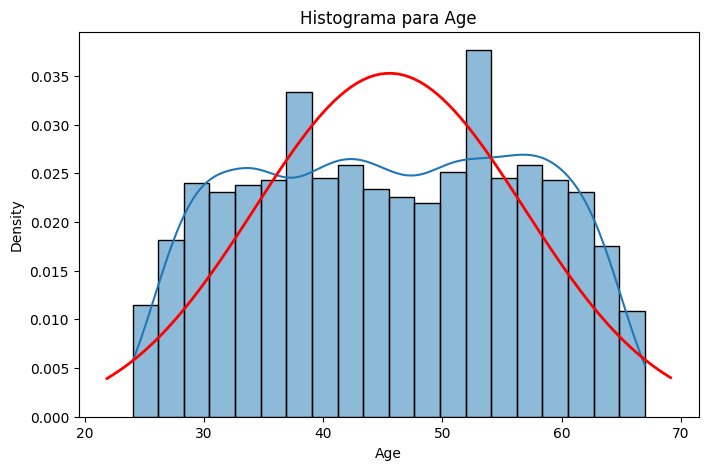

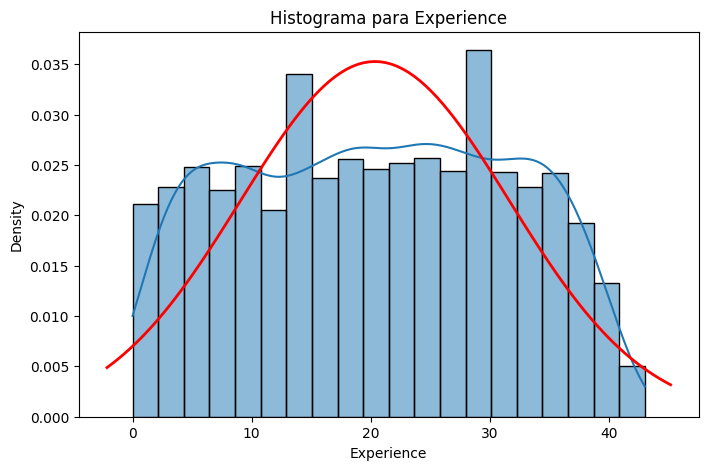

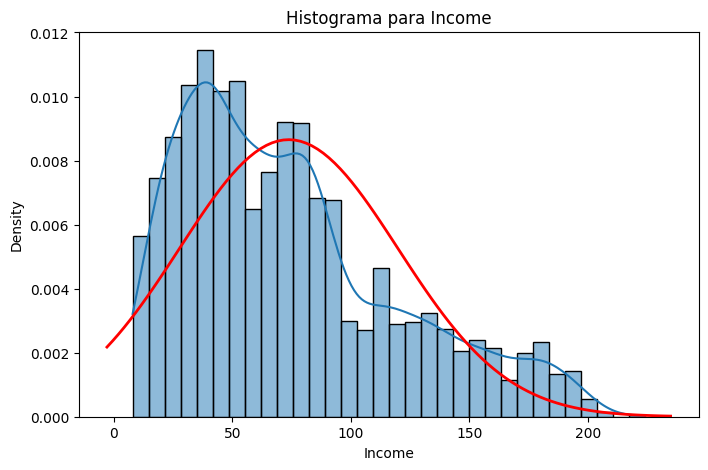

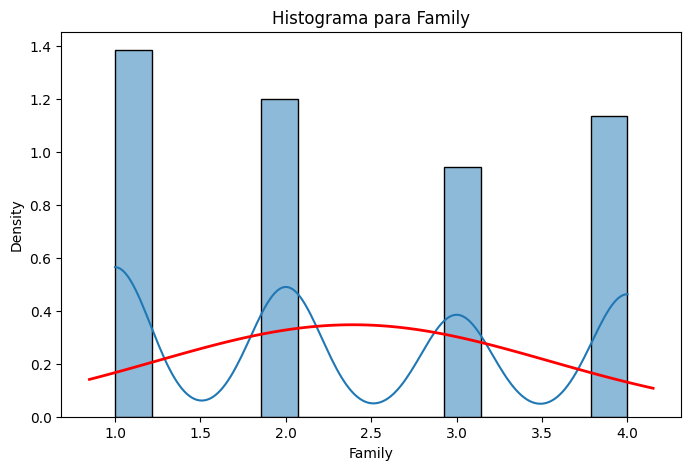

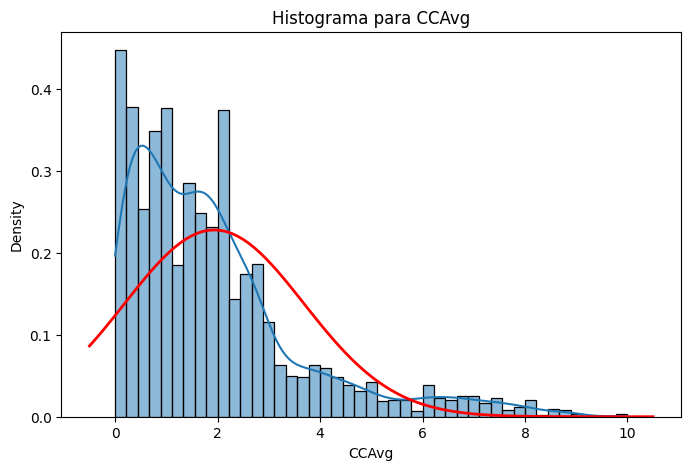

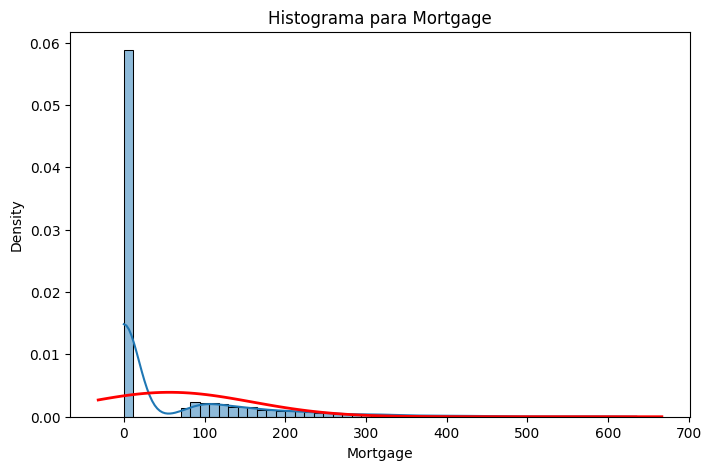


Boxplots para variables numericas:


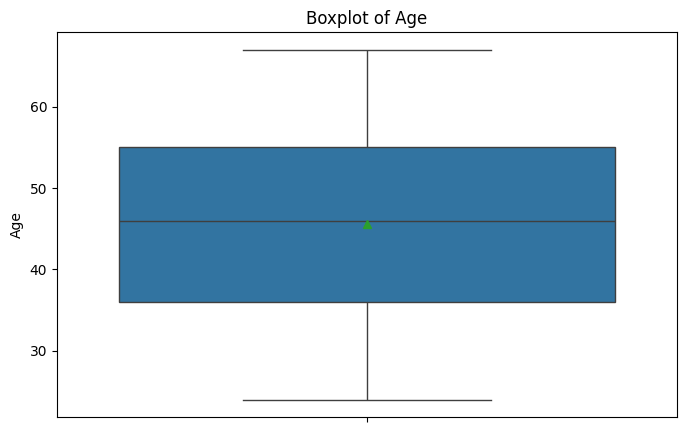

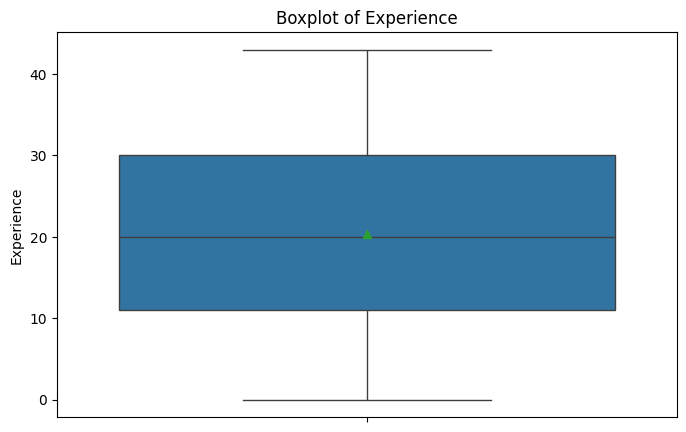

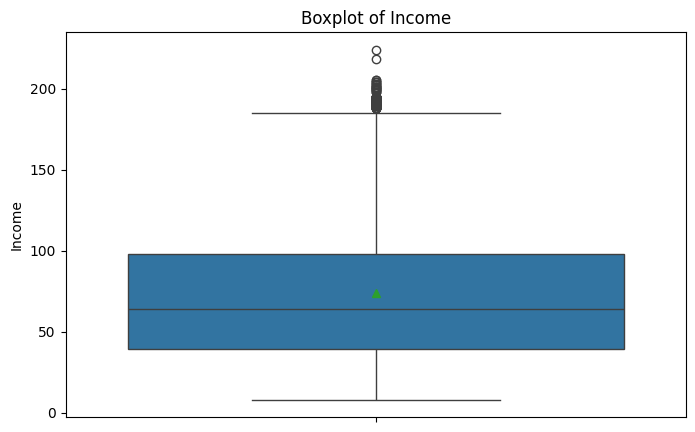

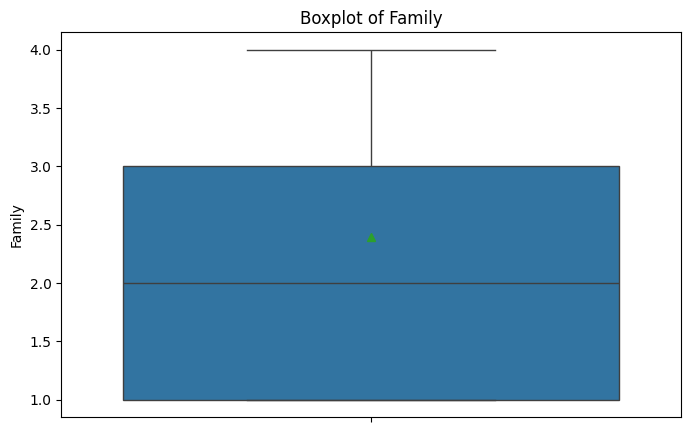

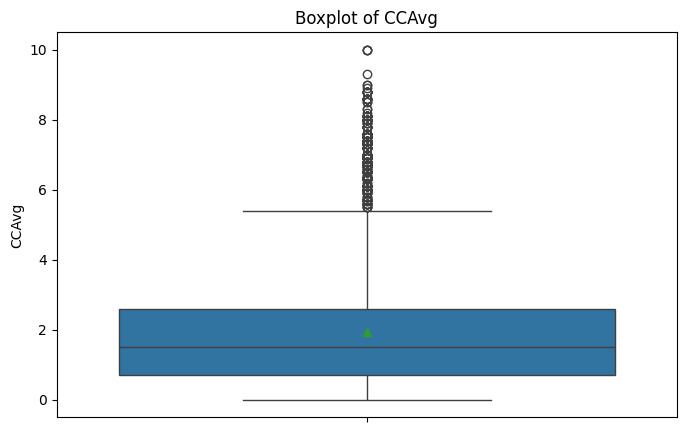

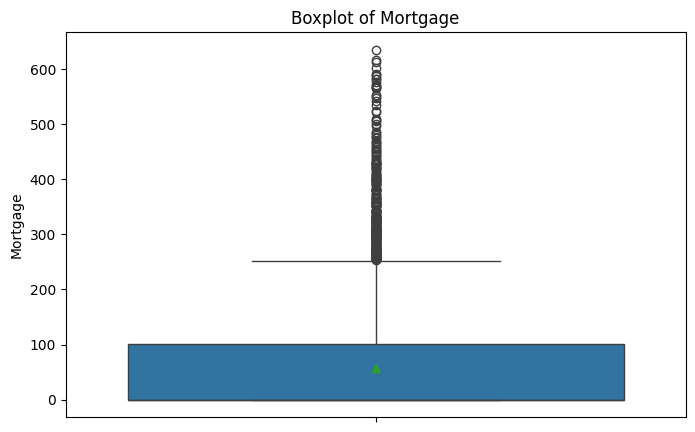

In [31]:
print("Histogramas para variables numéricas:")
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=loan_df, x=col, kde=True, stat="density", common_norm=False)

    mu, std = norm.fit(loan_df[col])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)

    plt.title(f'Histograma para {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

# Generar boxplots
print("\nBoxplots para variables numericas:")
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=loan_df, y=col, showmeans=True)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

    #considero que sí coinciden con lo esperado y al generar mi primer histograma de mi cuenta de un valor en educación
    #que era atípico por lo que regrese para excluirlo y solo mantener las 3 categorias de educación

8. Obtén las estadísticas descriptivas de las variables categóricas.
* Genera un gráfico de barras para cada variable. En las de alta cardinalidad, sólo incluye los 10 valores más relevantes.

Estadísticas descriptivas - variables categóricas:


,ZIP Code,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4942,4942,4942,4942,4942,4942,4942
unique,468,3,2,2,2,2,2
top,94720,1,0,0,0,1,0
freq,163,2079,4463,4427,4641,2952,3489



Bar plots para variables categóricas:


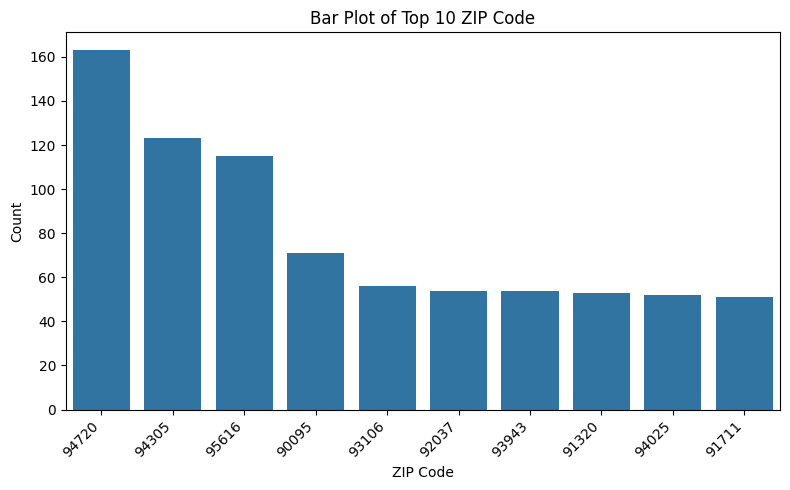

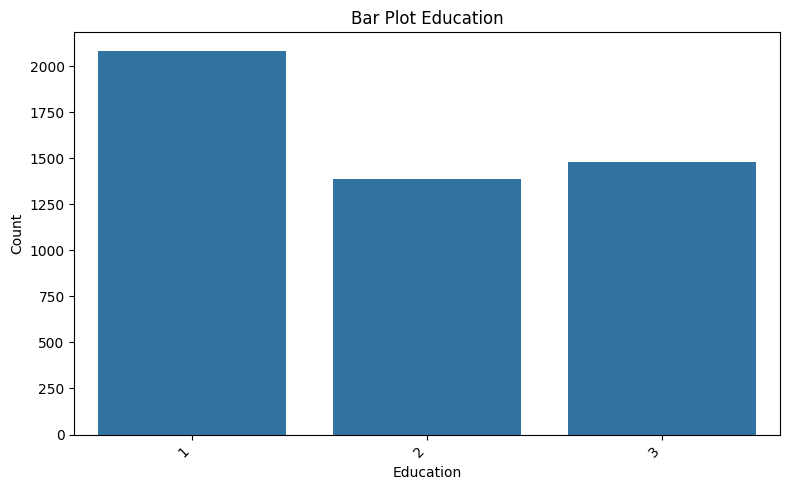

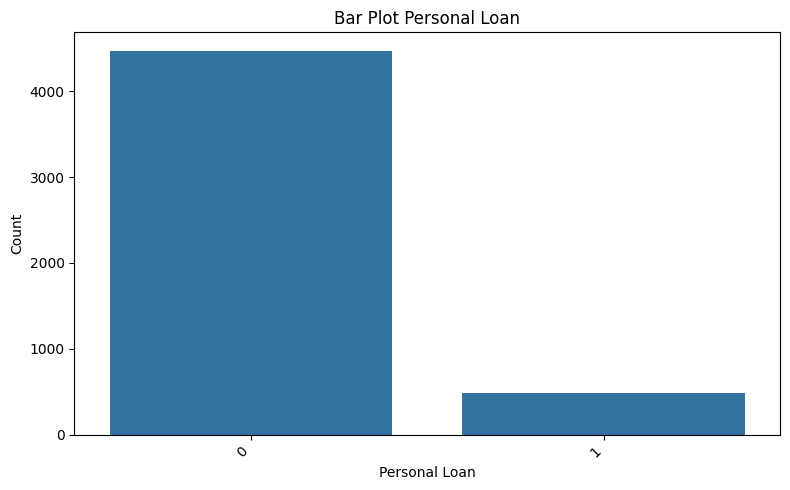

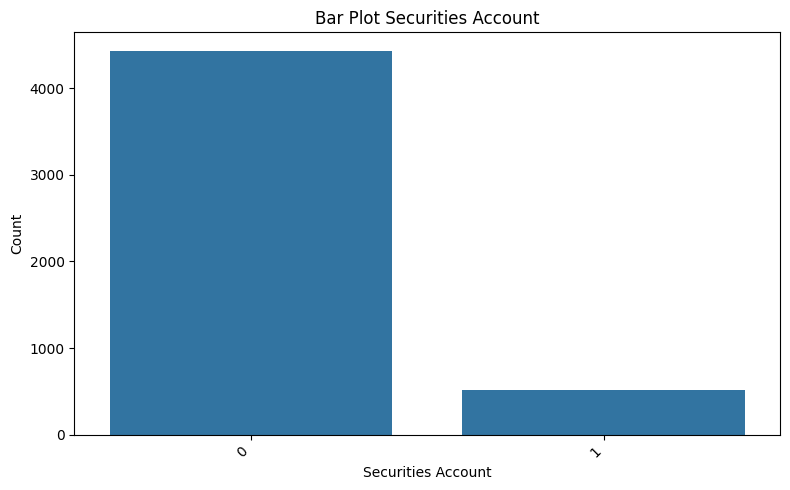

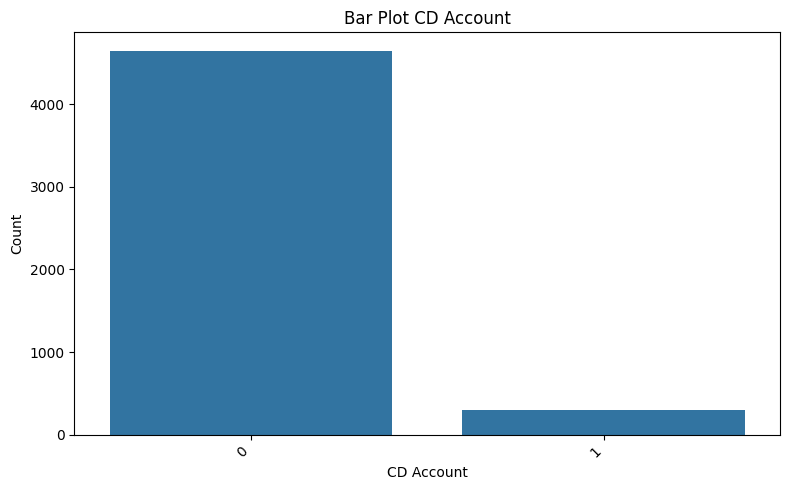

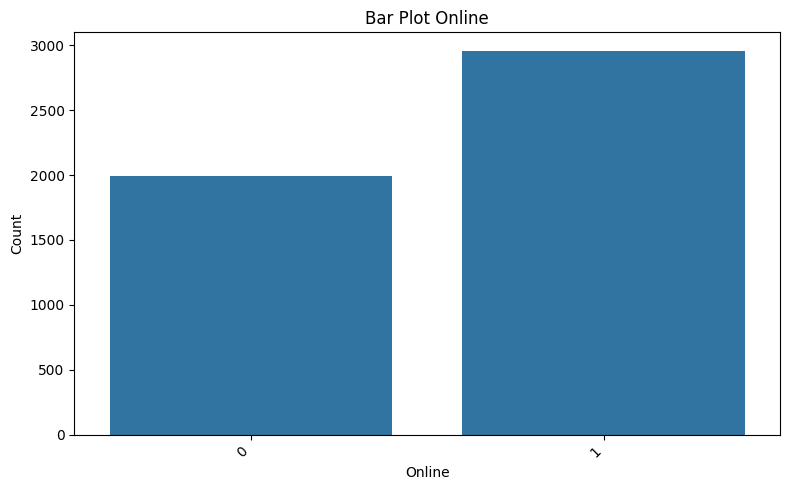

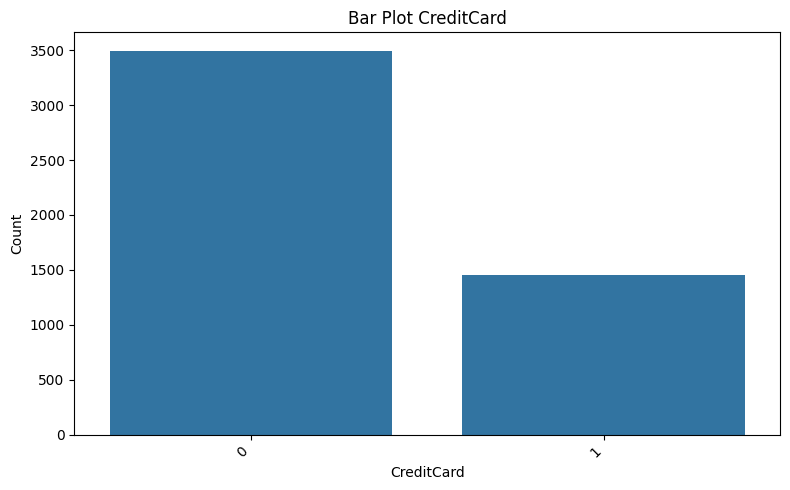

In [33]:
print("Estadísticas descriptivas - variables categóricas:")
display(loan_df[cat_cols].describe())

print("\nBar plots para variables categóricas:")
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    if loan_df[col].nunique() > 10:

        top_10_zips = loan_df[col].value_counts().nlargest(10).index
        sns.countplot(data=loan_df[loan_df[col].isin(top_10_zips)], x=col, order=top_10_zips)
        plt.title(f'Bar Plot of Top 10 {col}')
    else:
        sns.countplot(data=loan_df, x=col)
        plt.title(f'Bar Plot {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Análisis exploratorio de datos (bivariado)

9. Obtén la matriz de gráficos de dispersión (*scatter matrix*) de todas las variables numéricas.
* Observa las relaciones entre las variables, selecciona un par representativo y describe los patrones o tendencias que sean evidentes.
* Para cuantificar la fuerza y dirección de las relaciones observadas, genera un mapa de calor con los valores de correlación de *Pearson*. ¿El valor numérico obtenido del par seleccionado se corresponde con lo esperado?

Matriz de dispersión variables numéricas:


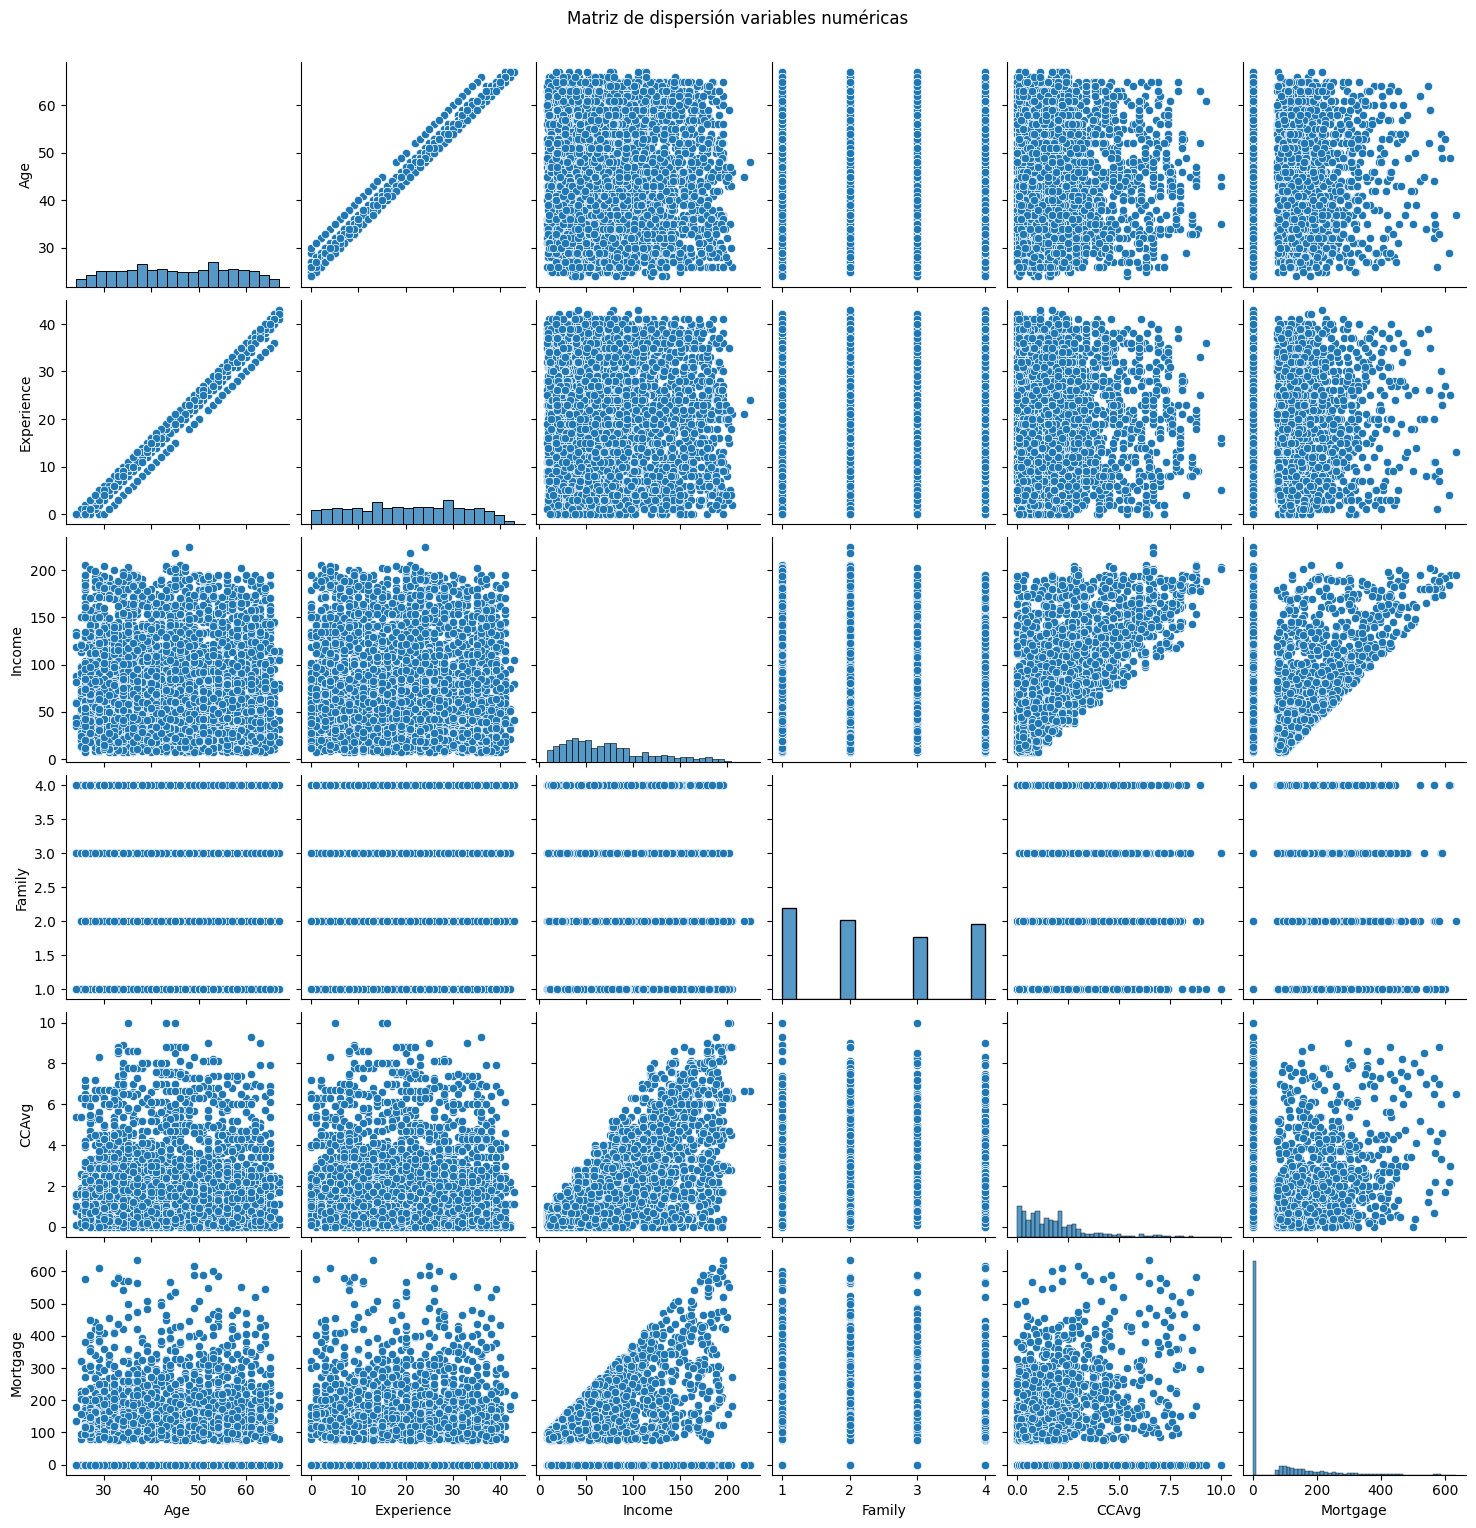


Heatmap de variables numericas:


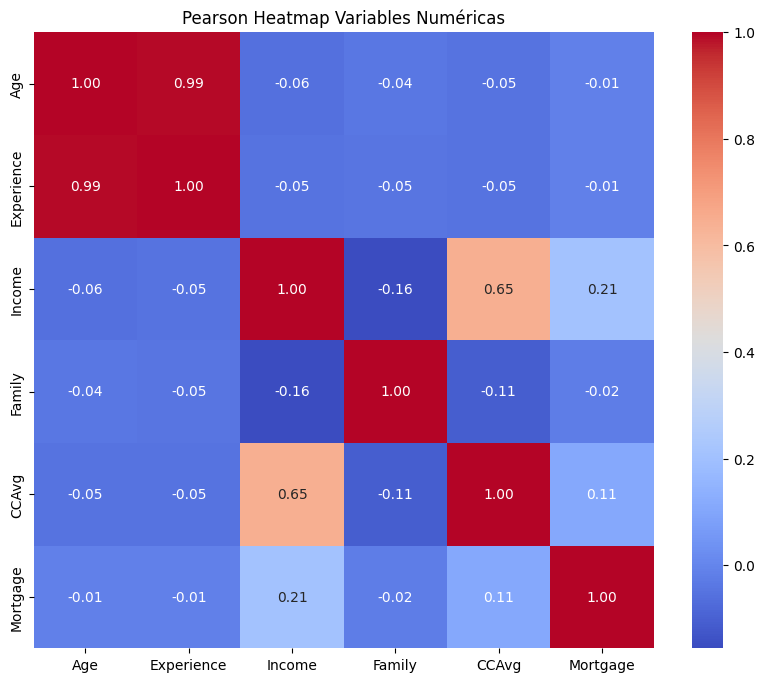

In [36]:
print("Matriz de dispersión variables numéricas:")
sns.pairplot(loan_df[num_cols])
plt.suptitle("Matriz de dispersión variables numéricas", y=1.02)
plt.show()

# Generar correlación y heatmap
print("\nHeatmap de variables numericas:")
plt.figure(figsize=(10, 8))
correlation_matrix = loan_df[num_cols].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Heatmap Variables Numéricas')
plt.show()

#Al calcular la correlación entre las columnas 'Ingresos' y 'CCAvg'. El resultado, ese 0.65 positivo, considero que
#demuestra que el pattern que noté en el diagrama de dispersión por lo que el numero valida la visualización"

10. Realiza un análisis de todas las variables del dataset con respecto a la variable de salida `Personal Loan`.
* Variables numéricas: Genera box plots para comparar la distribución de cada variable según los valores de `Personal Loan`.
* Variables categóricas (sin considerar `ZIP Code`): Genera gráficos de barras apiladas que muestren la distribución relativa de `Personal Loan` dentro de cada categoría de la variable.
* Para cada grupo de variables (numéricas y categóricas), comenta al menos un hallazgo o patrón relevante observado en los gráficos generados.


Box plots para variables numéricas vs. Personal Loan:


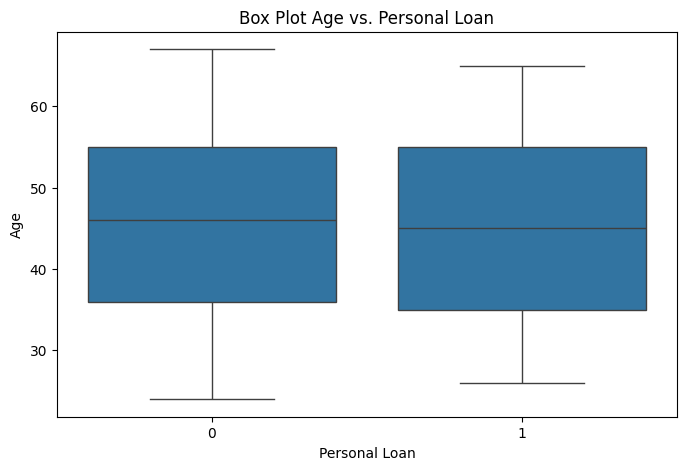

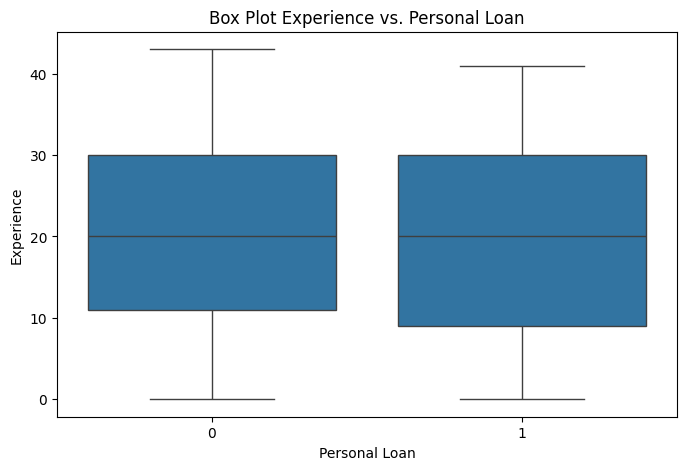

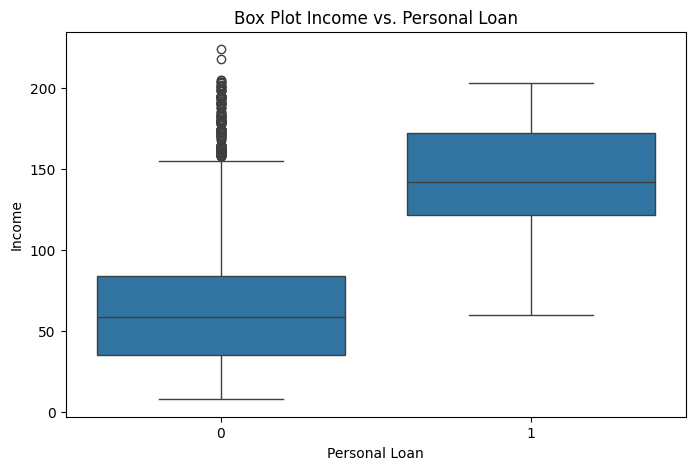

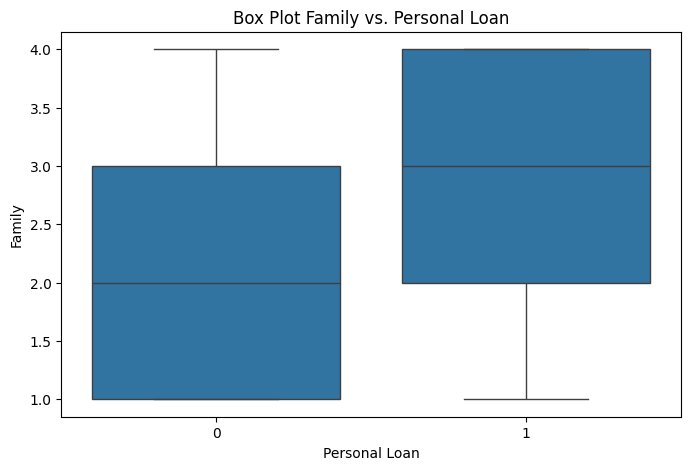

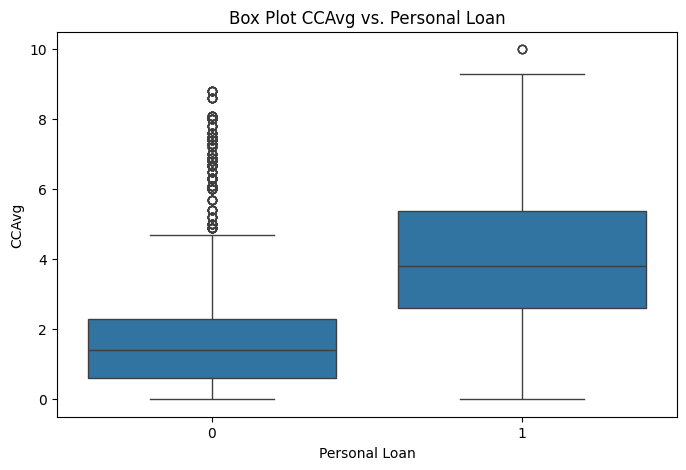

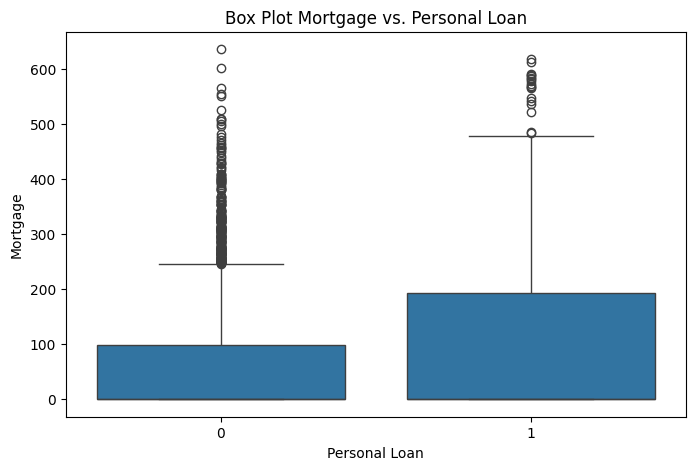


Barras apiladas para variables catagóricas (excluyendo ZIP Code) vs. Personal Loan:


<Figure size 800x500 with 0 Axes>

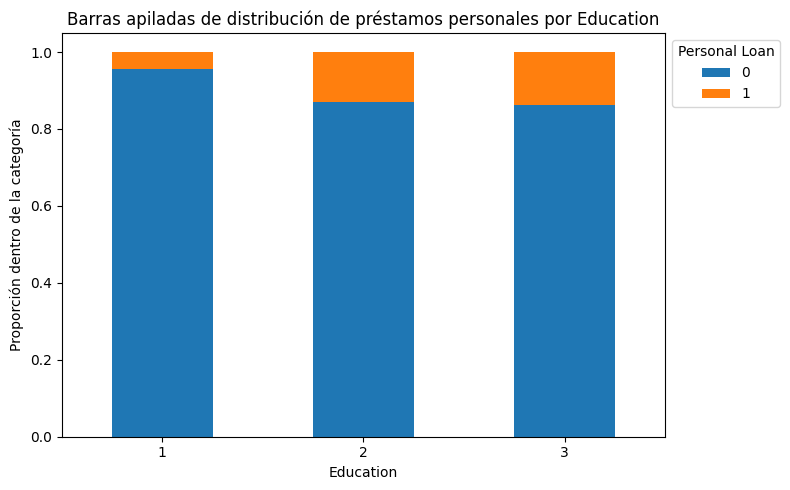

<Figure size 800x500 with 0 Axes>

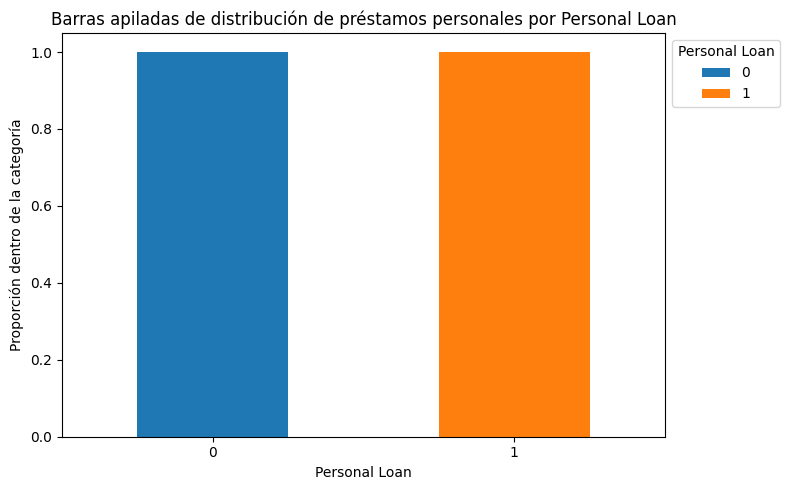

<Figure size 800x500 with 0 Axes>

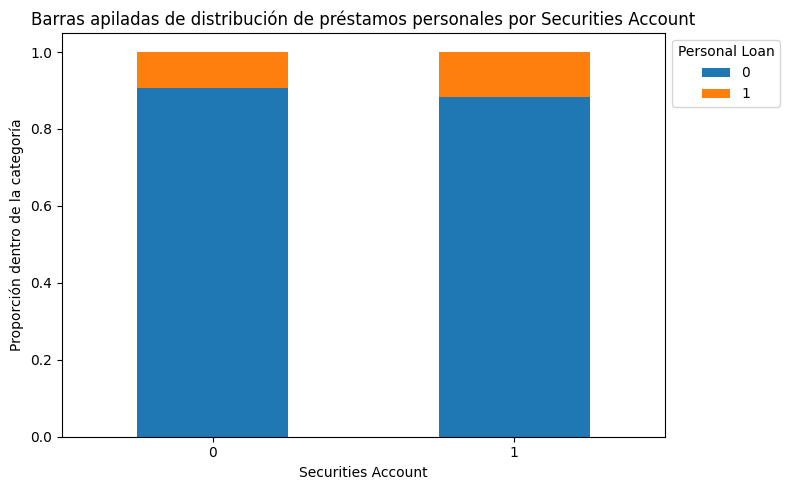

<Figure size 800x500 with 0 Axes>

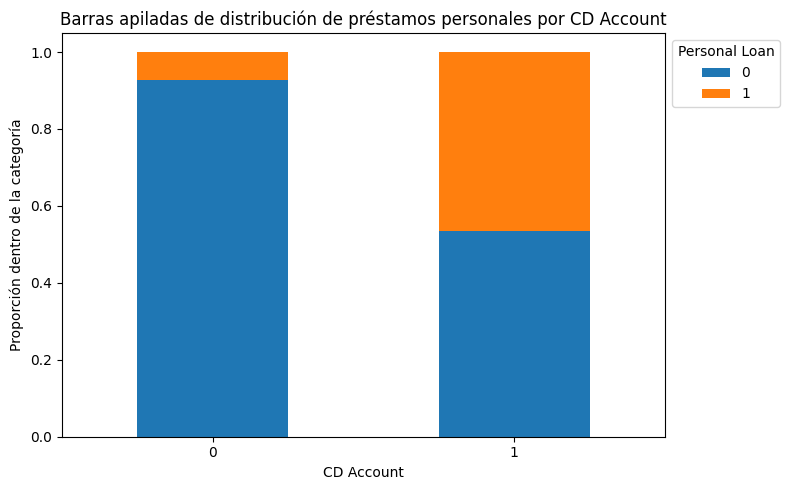

<Figure size 800x500 with 0 Axes>

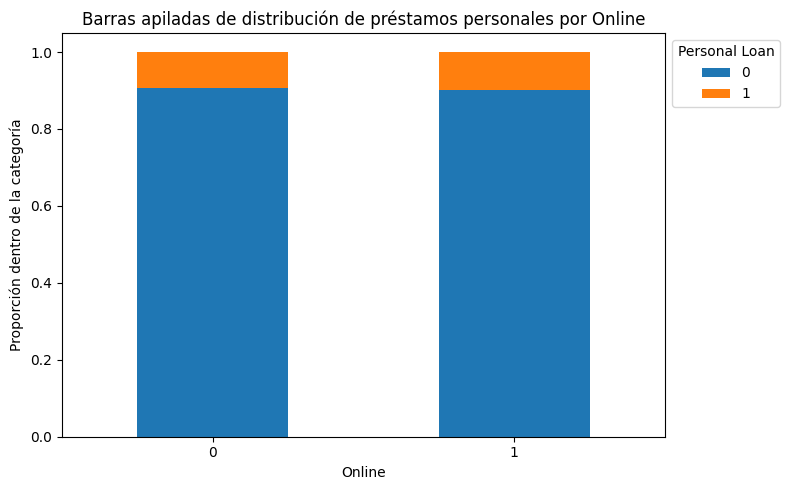

<Figure size 800x500 with 0 Axes>

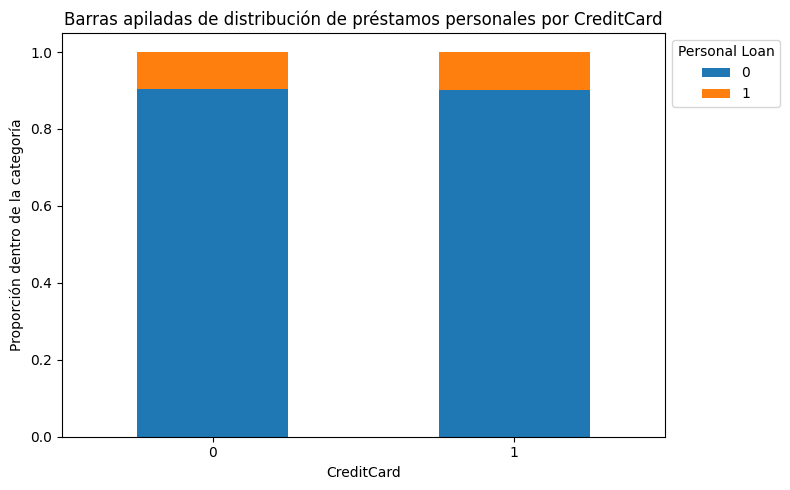

In [38]:
# Variables numéricas: Genera box plots para comparar la distribución de cada variable según los valores de Personal Loan.
print("Box plots para variables numéricas vs. Personal Loan:")
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=loan_df, x='Personal Loan', y=col)
    plt.title(f'Box Plot {col} vs. Personal Loan')
    plt.xlabel('Personal Loan')
    plt.ylabel(col)
    plt.show()

# Variables categóricas (sin considerar ZIP Code)... vs. Personal Loan
print("\nBarras apiladas para variables catagóricas (excluyendo ZIP Code) vs. Personal Loan:")
categorical_cols_for_bivariate = [col for col in cat_cols if col != 'ZIP Code']

for col in categorical_cols_for_bivariate:
    plt.figure(figsize=(8, 5))

    ct = pd.crosstab(loan_df[col], loan_df['Personal Loan'])

    ct_normalized = ct.div(ct.sum(1), axis=0)
    ct_normalized.plot(kind='bar', stacked=True, figsize=(8, 5))

    plt.title(f'Barras apiladas de distribución de préstamos personales por {col}')
    plt.xlabel(col)
    plt.ylabel('Proporción dentro de la categoría')
    plt.xticks(rotation=0)
    plt.legend(title='Personal Loan', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

    #Un hallazgo a comentar es sobre los clientes que aceptaron el préstamo personal (prestamo personal=1) vs los que no lo hicieron (prestamo personal =0) tienden a
    #tener ingresos significativamente más altos que aquellos que lo rechazaron por lo que los ingresos pueden ser un indicador fuerte respecto a si los clientes
    #aceptaran o no el credito.